In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import netCDF4
import time
import xarray

In [2]:
phil_cyclones = pd.read_pickle(os.path.join('..','deconstruct_cyn','phil_cyclones.pkl'))

In [3]:
""" Import landmask."""
#Elapsed time ~10 seconds.
tic = time.process_time()

nc_landmask = 'ETOPO1_Ice_g_gmt4.nc' #Land mask from ETOPO1 Global Relief Model
path_to_nc2 = os.path.join('..','deconstruct_cyn',nc_landmask)

landmask_all_fields = xarray.open_dataset(path_to_nc2).to_dataframe()

toc = time.process_time()

elapsed = toc - tic
print(elapsed)

6.65625


# Creating a Boolean Mask for the Phillipines

Here we want to create a bounding box for the phillipines. Note that the box made by the previous project team had sloped sides, so this approach will work for an arbitrary quadrilateral.

In [4]:
lm2 = landmask_all_fields.reset_index()

In [5]:
eps = 1e-3

m1 = 1/5
m2 = -130/53
m3 = 27/56
m4 = -73/26

c1 = -5.38
c2 = +320.65
c3 = -55.61
c4 = +347.72

Here we split the box into three parts, alpha (a), beta (b), gamma.
Then join them by finding the union of the three sets of lon, lat points.

In [6]:
lat_within_a = (18.1-eps <= lm2.lat) & (lm2.lat <= (19.2+eps))
lat_within_a.value_counts()

False    231865134
True       1447267
Name: lat, dtype: int64

In [7]:
lon_left_a = (lm2.lat - c1)/m1
lon_right_a = (lm2.lat - c2)/m2
lon_within_a = (lon_left_a <= lm2.lon) & (lm2.lon <= lon_right_a)
lon_within_a.value_counts()

False    138502946
True      94809455
dtype: int64

In [8]:
point_within_a = lat_within_a & lon_within_a
point_within_a.value_counts()

False    233300429
True         11972
dtype: int64

In [9]:
lat_within_b = (6.2 <= lm2.lat) & (lm2.lat <= 18.1)
lat_within_b.value_counts()

False    217867686
True      15444715
Name: lat, dtype: int64

In [10]:
lon_left_b = (lm2.lat - c4)/m4
lon_right_b = (lm2.lat - c2)/m2
lon_within_b = (lon_left_b <= lm2.lon) & (lm2.lon <= lon_right_b)
lon_within_b.value_counts()

False    228853085
True       4459316
dtype: int64

In [11]:
point_within_b = lat_within_b & lon_within_b
point_within_b.value_counts()

False    233044064
True        268337
dtype: int64

In [12]:
lat_within_gamma = (3.484 <= lm2.lat) & (lm2.lat <= 6.2) #originally 3.5 - 6.2
lat_within_gamma.value_counts()

False    229813039
True       3499362
Name: lat, dtype: int64

In [13]:
lon_left_gamma = (lm2.lat - c4)/m4
lon_right_gamma = (lm2.lat - c3)/m3
lon_within_gamma = (lon_left_gamma <= lm2.lon) & (lm2.lon <= lon_right_gamma)
lon_within_gamma.value_counts()

False    213496005
True      19816396
dtype: int64

In [14]:
point_within_gamma = lat_within_gamma & lon_within_gamma
point_within_gamma.value_counts()



False    233280713
True         31688
dtype: int64

In [15]:
point_within_phillipines_box = (point_within_a | point_within_b | point_within_gamma)
point_within_phillipines_box.value_counts()

False    233000761
True        311640
dtype: int64

In [16]:
lm2['phil_box'] = point_within_phillipines_box

In [17]:
phil = lm2[lm2.phil_box]

In [18]:
phindex = phil.set_index(['lon','lat'])

In [19]:
ztable = phindex.z.unstack(level=0) #122.600000 3.516667  122.60000000000001

In [20]:
lat = ztable.index

In [21]:
lon = ztable.columns

In [22]:
z2tab = phil.pivot('lat', 'lon')['z']

In [23]:
lonmesh, latmesh = np.meshgrid(lon, lat)

In [67]:
%matplotlib notebook

<IPython.core.display.Javascript object>


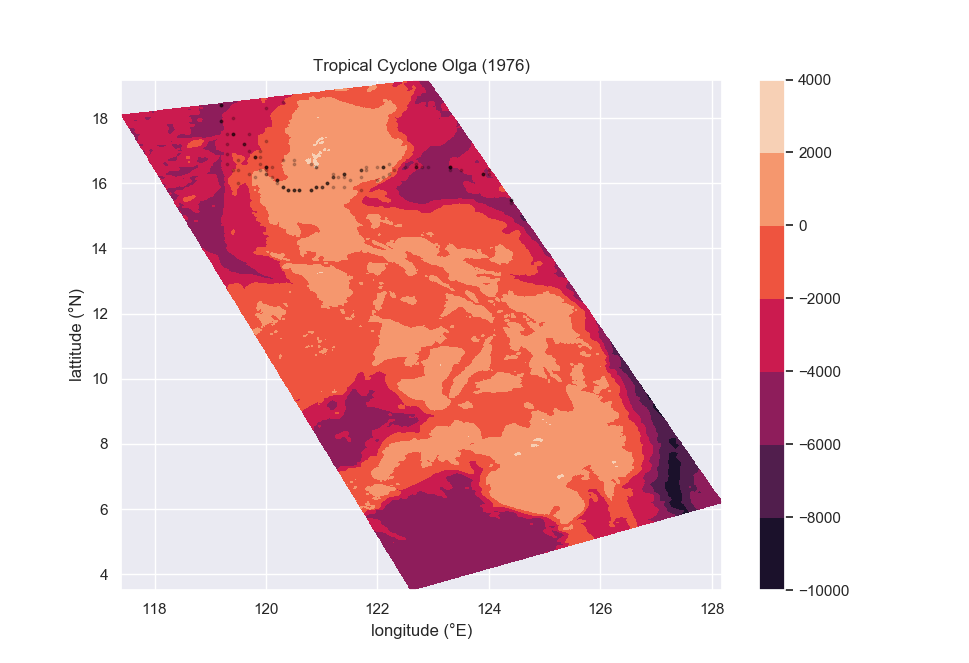

In [75]:
plt.contourf(lonmesh, latmesh, ztable)

In [77]:
plt.colorbar()

In [76]:
plt.xlabel('longitude (°E)')

Text(0.5, 20.049999999999997, 'longitude (°E)')

In [78]:
plt.ylabel('lattitude (°N)')

Text(44.125, 0.5, 'lattitude (°N)')

In [27]:
plt.title('Altitude above sea level for selected region - Phillipines')

Text(0.5, 1.0, 'Altitude above sea level for selected region - Phillipines')

In [28]:
plt.savefig('phil_altitude.png')

In [49]:
plt.scatter(phil_cyclones['lon'],phil_cyclones['lat'], c = 'white', alpha = 0.2, s = 1)

In [50]:
plt.legend(['cyclones in white',])

Text(0.5, 20.049999999999997, 'longitude (°E)')

In [51]:
plt.title('Cyclones detected in IBTracs data in Phillipines region')

Text(44.125, 0.5, 'lattitude (°N)')

In [56]:
plt.savefig('phil_selections.png')

In [72]:
olga = phil_cyclones[phil_cyclones.storm_sn == b'1976131N12142']

In [79]:
plt.scatter(olga['lon'], olga['lat'], c = 'black', alpha = 0.2, s = 3)

In [80]:
plt.title('Tropical Cyclone Olga (1976)')

Text(0.5, 1.0, 'Tropical Cyclone Olga (1976)')

In [81]:
plt.savefig('olga.png')